In [1]:
# Setup and Imports

# Core libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

# Plot style
plt.style.use("seaborn-v0_8-whitegrid")
sns.set_context("notebook", font_scale=1.1)

# Paths
DATA_DIR = Path("../data")
df = pd.read_csv(DATA_DIR / "Base.csv")

print(f"Shape: {df.shape}")
df.head(3)

Shape: (1000000, 32)


,fraud_bool,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,payment_type,zip_count_4w,...,has_other_cards,proposed_credit_limit,foreign_request,source,session_length_in_minutes,device_os,keep_alive_session,device_distinct_emails_8w,device_fraud_count,month
0,0,0.3,0.986506,-1,25,40,0.006735,102.453711,AA,1059,...,0,1500.0,0,INTERNET,16.224843,linux,1,1,0,0
1,0,0.8,0.617426,-1,89,20,0.010095,-0.849551,AD,1658,...,0,1500.0,0,INTERNET,3.363854,other,1,1,0,0
2,0,0.8,0.996707,9,14,40,0.012316,-1.490386,AB,1095,...,0,200.0,0,INTERNET,22.730559,windows,0,1,0,0


In [2]:
# Initial Data Health Check
# Basic structure
df.info()

# Count of missing (encoded as -1)
missing = (df == -1).sum().sort_values(ascending=False)
missing = missing[missing > 0]
missing

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 32 columns):
 #   Column                            Non-Null Count    Dtype  
---  ------                            --------------    -----  
 0   fraud_bool                        1000000 non-null  int64  
 1   income                            1000000 non-null  float64
 2   name_email_similarity             1000000 non-null  float64
 3   prev_address_months_count         1000000 non-null  int64  
 4   current_address_months_count      1000000 non-null  int64  
 5   customer_age                      1000000 non-null  int64  
 6   days_since_request                1000000 non-null  float64
 7   intended_balcon_amount            1000000 non-null  float64
 8   payment_type                      1000000 non-null  object 
 9   zip_count_4w                      1000000 non-null  int64  
 10  velocity_6h                       1000000 non-null  float64
 11  velocity_24h                      1000

prev_address_months_count       712920
bank_months_count               253635
current_address_months_count      4254
session_length_in_minutes         2015
credit_risk_score                  488
device_distinct_emails_8w          359
dtype: int64

/var/folders/tc/3545y3c91mn0yc1cb325xfxm0000gn/T/ipykernel_47042/3900199390.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=fraud_counts.index, y=fraud_counts.values, palette=["#4c72b0", "#dd8452"])


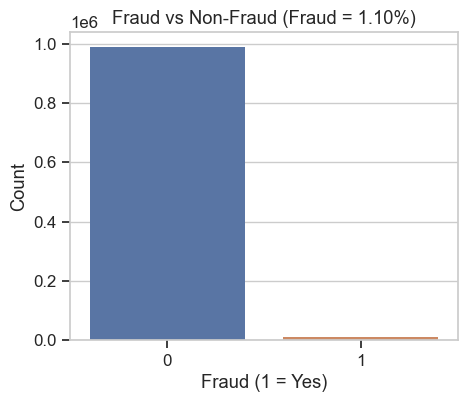

In [3]:
# Class Distribution
fraud_counts = df["fraud_bool"].value_counts()
fraud_ratio = fraud_counts[1] / fraud_counts.sum()

plt.figure(figsize=(5,4))
sns.barplot(x=fraud_counts.index, y=fraud_counts.values, palette=["#4c72b0", "#dd8452"])
plt.title(f"Fraud vs Non-Fraud (Fraud = {fraud_ratio:.2%})")
plt.xlabel("Fraud (1 = Yes)")
plt.ylabel("Count")
plt.show()

In [4]:
# Numerical Features Summary
num_cols = df.select_dtypes(include=[np.number]).columns.drop("fraud_bool")
num_summary = df[num_cols].describe().T
num_summary["missing_%"] = (df[num_cols] == -1).sum() / len(df) * 100
num_summary.head(10)

,count,mean,std,min,25%,50%,75%,max,missing_%
income,1000000.0,0.562696,0.290343,1.000000e-01,0.300000,0.600000,0.800000,0.900000,0.0000
name_email_similarity,1000000.0,0.493694,0.289125,1.434550e-06,0.225216,0.492153,0.755567,0.999999,0.0000
prev_address_months_count,1000000.0,16.718568,44.046230,-1.000000e+00,-1.000000,-1.000000,12.000000,383.000000,71.2920
current_address_months_count,1000000.0,86.587867,88.406599,-1.000000e+00,19.000000,52.000000,130.000000,428.000000,0.4254
customer_age,1000000.0,33.689080,12.025799,1.000000e+01,20.000000,30.000000,40.000000,90.000000,0.0000
days_since_request,1000000.0,1.025705,5.381835,4.036860e-09,0.007193,0.015176,0.026331,78.456904,0.0000
intended_balcon_amount,1000000.0,8.661499,20.236155,-1.553055e+01,-1.181488,-0.830507,4.984176,112.956928,0.0000
zip_count_4w,1000000.0,1572.692049,1005.374565,1.000000e+00,894.000000,1263.000000,1944.000000,6700.000000,0.0000
velocity_6h,1000000.0,5665.296605,3009.380665,-1.706031e+02,3436.365848,5319.769349,7680.717827,16715.565404,0.0000
velocity_24h,1000000.0,4769.781965,1479.212612,1.300307e+03,3593.179135,4749.921161,5752.574191,9506.896596,0.0000


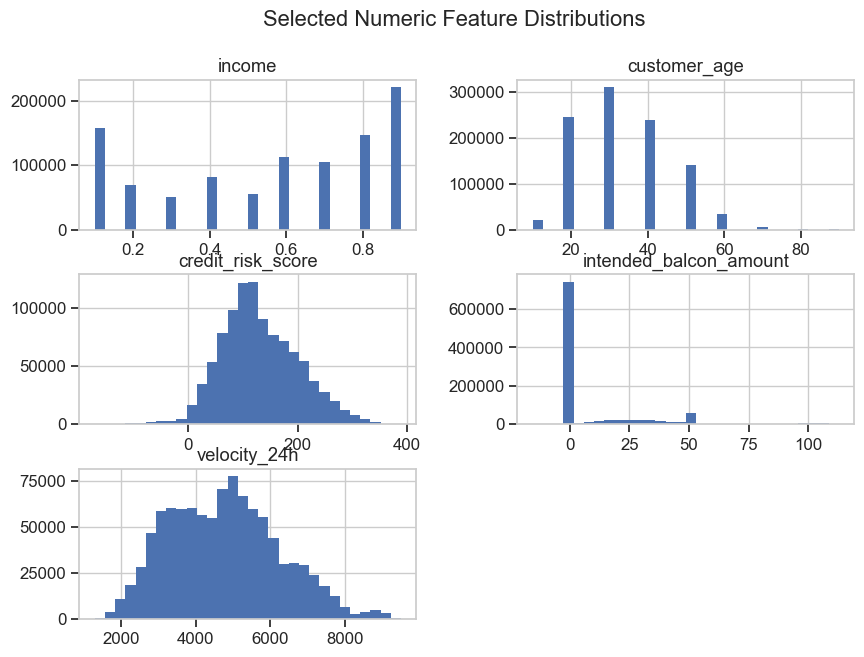

In [5]:
# distributions plot
key_numeric = ["income", "customer_age", "credit_risk_score",
               "intended_balcon_amount", "velocity_24h"]
df[key_numeric].hist(bins=30, figsize=(10,7), color="#4c72b0")
plt.suptitle("Selected Numeric Feature Distributions")
plt.show()

/var/folders/tc/3545y3c91mn0yc1cb325xfxm0000gn/T/ipykernel_47042/677679728.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette="crest")


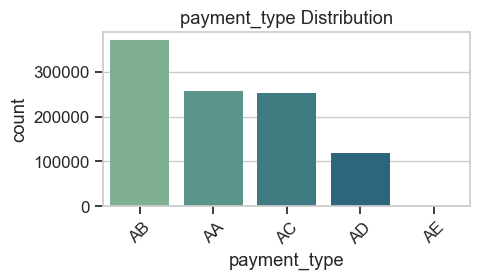

/var/folders/tc/3545y3c91mn0yc1cb325xfxm0000gn/T/ipykernel_47042/677679728.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette="crest")


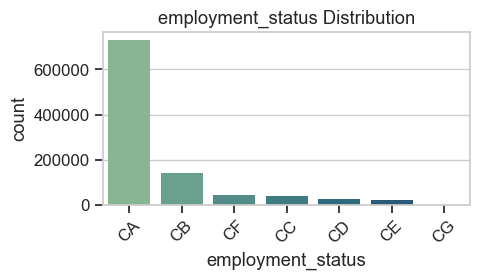

/var/folders/tc/3545y3c91mn0yc1cb325xfxm0000gn/T/ipykernel_47042/677679728.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette="crest")


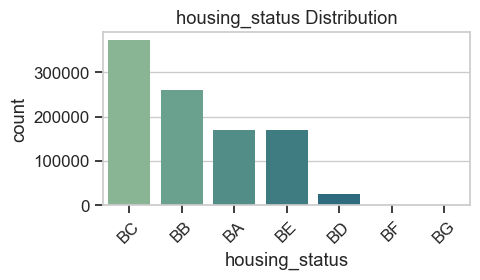

/var/folders/tc/3545y3c91mn0yc1cb325xfxm0000gn/T/ipykernel_47042/677679728.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette="crest")


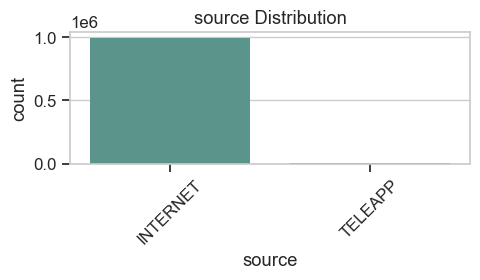

/var/folders/tc/3545y3c91mn0yc1cb325xfxm0000gn/T/ipykernel_47042/677679728.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette="crest")


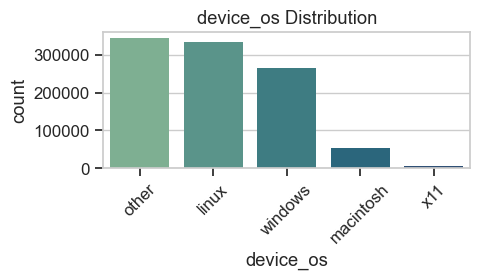

/var/folders/tc/3545y3c91mn0yc1cb325xfxm0000gn/T/ipykernel_47042/677679728.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette="crest")


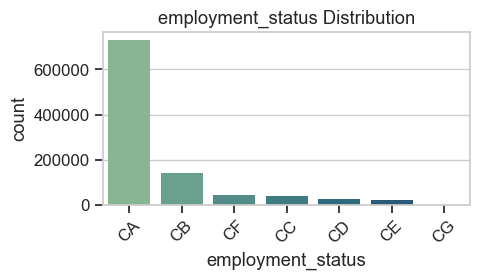

/var/folders/tc/3545y3c91mn0yc1cb325xfxm0000gn/T/ipykernel_47042/677679728.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette="crest")


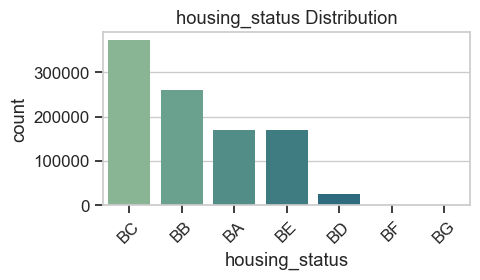

/var/folders/tc/3545y3c91mn0yc1cb325xfxm0000gn/T/ipykernel_47042/677679728.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette="crest")


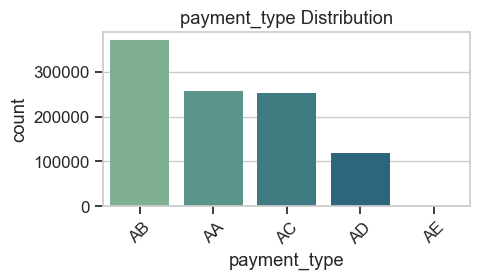

/var/folders/tc/3545y3c91mn0yc1cb325xfxm0000gn/T/ipykernel_47042/677679728.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette="crest")


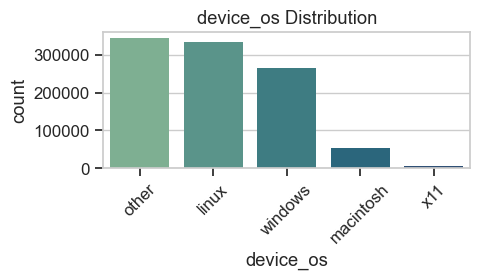

/var/folders/tc/3545y3c91mn0yc1cb325xfxm0000gn/T/ipykernel_47042/677679728.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette="crest")


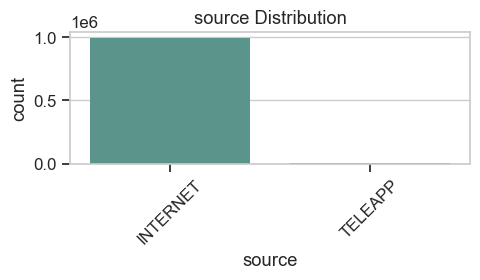

In [6]:
# Categorical Features Overview
cat_cols = df.select_dtypes(include=["object"]).columns.tolist() + [
    "employment_status", "housing_status", "payment_type",
    "device_os", "source"
]

for col in cat_cols:
    plt.figure(figsize=(5,3))
    sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette="crest")
    plt.title(f"{col} Distribution")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


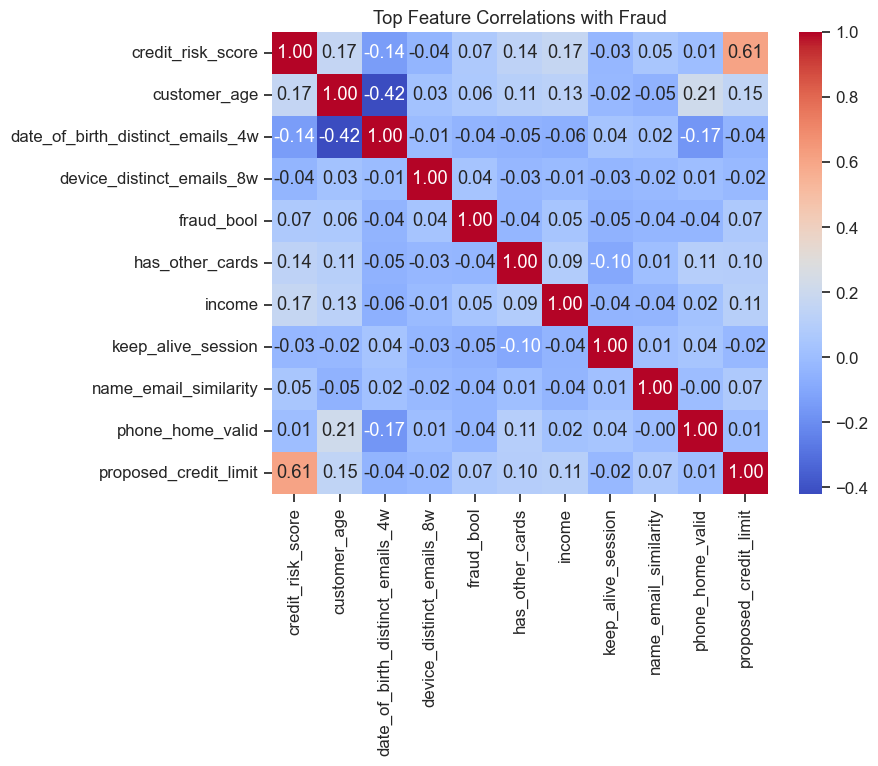

In [7]:
# Correlation Analysis
# Compute correlation with target
corr = df.corr(numeric_only=True)["fraud_bool"].sort_values(key=abs, ascending=False)
corr.head(15)

# Heatmap for top correlated features
top_corr = corr.index[1:11]  # skip fraud_bool itself
plt.figure(figsize=(8,6))
sns.heatmap(df[top_corr.union(["fraud_bool"])].corr(numeric_only=True),
            annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Top Feature Correlations with Fraud")
plt.show()

# Data Understanding — Summary

The Base.csv dataset contains 1,000,000 records and 32 columns (31 features + 1 target, fraud_bool).

1. Data Health & Missingness

Several numeric fields contain placeholder –1 values instead of true nulls.

The most affected variables are:

prev_address_months_count (≈ 71 % missing)

bank_months_count (≈ 25 %)

current_address_months_count (≈ 0.4 %)

session_length_in_minutes (≈ 0.2 %)

credit_risk_score (≈ 0.05 %)

device_distinct_emails_8w (≈ 0.04 %)

These suggest that address history and session-related data are often incomplete, requiring special imputation or exclusion later.

2. Target Class Distribution

Fraud cases = 1.10 % of total (≈ 11 k fraudulent / 989 k legit).

This confirms severe class imbalance, so later model stages must use resampling or class weighting.

The visualization shows a sharp dominance of non-fraud instances, typical of financial fraud datasets.

3. Numeric Feature Characteristics

income and name_email_similarity are evenly spread; both span 0–1, implying normalized or scaled inputs.

customer_age clusters around 30–40 years, consistent with realistic applicant demographics.

credit_risk_score appears approximately normal (mean ≈ 200), showing a stable internal scoring metric.

intended_balcon_amount and velocity variables (velocity_6h, velocity_24h) are highly skewed, dominated by very small values with long right tails → likely benefit from log-transformation.

Outliers exist in the velocity and balance-related features, matching expected financial behavior variance.

4. Categorical Feature Distributions

payment_type: Five anonymized categories; AB dominates, possibly default plan type.

employment_status: Highly imbalanced; CA category (~70 %) likely “employed” or equivalent stable status.

housing_status: Mostly BC and BB, indicating majority ownership or rental categories.

source: Over 95 % of applications via INTERNET, very few through TELEAPP.

device_os: Mix of other, linux, and windows, with minor macOS/X11 use — indicating diverse but somewhat anonymized device info.

These distributions highlight the anonymized but still realistic customer and application diversity.

5. Correlation Insights

The correlation matrix reveals:

Top correlation with fraud:

credit_risk_score (weak-positive ≈ 0.07 → fraud ↑ when risk ↑).

income and customer_age show small positive relations (higher values → slightly higher fraud probability).

name_email_similarity and device_distinct_emails_8w show weak signals, consistent with identity inconsistencies.

Strong internal correlation between:

proposed_credit_limit and credit_risk_score (r ≈ 0.6) — suggesting potential redundancy.

Minor associations among velocity metrics.

Overall, no single numeric feature dominates fraud prediction, but several together indicate behavioral or identity anomalies.

6. Key Observations

Data quality is acceptable but with heavy –1 placeholders.

Skewed numeric variables and imbalanced classes demand corrective preprocessing.

Feature redundancy (e.g., credit limit ↔ risk score) can affect multicollinearity.

Fraud signatures are subtle — emphasizing the need for complex models and feature engineering.